In [ ]:
# 1. TypedDict: Think of this as a blueprint for a form or label.
# It ensures we know exactly what fields (like 'name' or 'age') are allowed.
from typing import TypedDict, Dict

# 2. StateGraph: This is the factory floor manager.
# It helps us build the 'conveyor belt' (the graph) where our data moves from
# one station (node) to the next.
from langgraph.graph import StateGraph

#### Create a **Personalized Compliment Agent** using LangGraph

In [ ]:
# 1. AgentState is like a BOX moving on a conveyor belt.
# It defines what's inside the box. Here, it has a slot for a 'name'
# and that slot can only hold text (str).
class AgentState(TypedDict):
    name : str

# 2. This function is a WORKER on the assembly line.
# The worker (node) receives the box (state), opens it, and does a job.
def compliment_node(state : AgentState) -> AgentState:
    """ This node adds a compliment to the message """
    
    # 3. The worker reads the name, adds a nice message to it,
    # and puts the updated version back in the box.
    state["name"] = state["name"] + ", you are doing a great job!"
    
    # 4. The worker pushes the box to the next station (returns the state).
    return state

In [ ]:
# 1. Initialize the Graph (Factory Floor)
# We tell the manager, "This factory will process boxes that look like AgentState."
graph = StateGraph(AgentState)

# 2. Add a Station (Node)
# We create a workstation called "compliment" and assign the "compliment_node" worker to it.
graph.add_node("compliment", compliment_node)

# 3. Set the Starting Point
# We say, "When a new box arrives, send it to the 'compliment' station first."
graph.set_entry_point("compliment")

# 4. Set the Exit Point
# We say, "After the 'compliment' station is done, the job is finished."
graph.set_finish_point("compliment")

# 5. Build the Machine (Compile)
# This turns our plan into a working machine (app) that can actually run.
app = graph.compile()

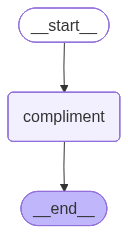

In [28]:
# 1. Import Visualization Tools
# These are just helpers to show images inside a Jupyter Notebook.
from IPython.display import display, Image

# 2. Visualize the Factory Floor
# app.get_graph() -> Gets the blueprint of our graph.
# .draw_mermaid_png() -> Draws a picture of the workflow (Start -> Compliment -> End).
# display(Image(...)) -> Shows that picture right here on the screen.
display(Image(app.get_graph().draw_mermaid_png()))

In [29]:
# 1. Run the Machine (Invoke)
# We turn the switch ON and feed raw material into the start of the line.
# Our raw material is a dictionary with the name "Bob".
# The machine processes it through all the steps we defined.
result = app.invoke({"name": "Bob"})

# 2. Inspect the Result
# The machine spits out the finished box. We open it to see the updated value.
# It should now say: "Bob, you are doing a great job!"
result["name"]

'Bob, you are doing a great job!'

In [35]:
# class dog:
#     def __init__(self, name, age):
#         self.name = name
#         self.age = age

#     def bark(self):
#         return "Woof Woff"
    
#     def tail(self):
#         return "Wagging"
    
#     def __str__(self):
#         return f"{self.bark()} My name is {self.name} and I am {self.age} years old. {self.tail()}"

# name = {"Max", "Simba", "Pogo"}
# age = {1, 2, 3}

# for name, age in zip(name, age):
#     my_dog = dog(name, age)
#     print(my_dog)

Woof Woff My name is Pogo and I am 1 years old. Wagging
Woof Woff My name is Max and I am 2 years old. Wagging
Woof Woff My name is Simba and I am 3 years old. Wagging
